Getting started

1. Mount to the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

2. Install the required libraries

In [ ]:
!pip install rasterio
!pip install geopandas
!pip install rioxarray
!pip install pyshp
!pip install gdal
!pip install gis
!pip install xarray
!pip install pandas

3. Import the modules

In [3]:
import os
import sys
from time import sleep
import gc
from pathlib import Path
import rasterio
from rasterio.plot import show
from rasterio.enums import Resampling
import geopandas
import geopandas as gpd
import pandas as pd
import numpy as np
import rioxarray as riox
import xarray
import dask
from rasterio.features import shapes
import multiprocessing
from osgeo import ogr, gdal
import shapefile
import rasterio as rio
import rioxarray as rxr
import xarray as xr
import dask.array as da
import gis
import tqdm
from tqdm import tqdm
import csv
import matplotlib.pyplot as plt

##Calculations

* Specify the input and output directory path    **don't forget to add a (/) at the end of the path

In [30]:
output_directory = "/content/drive/MyDrive/Country_based_Colab_WaPOR4Awp/Data/"


##1. Calculating area of the irrigated cropland's raster layer

In [13]:
import numpy as np
from geopy.distance import geodesic
from osgeo import gdal
import os
import pandas as pd

def MapPixelAreakm(file_path, value=42, approximate_lengths=False):

    ds = gdal.Open(file_path)
    band = ds.GetRasterBand(1)
    NDV = band.GetNoDataValue()
    xsize = ds.RasterXSize
    ysize = ds.RasterYSize
    GeoT = ds.GetGeoTransform()
    Projection = ds.GetProjection()

    pixel_values = band.ReadAsArray()

    valid_pixels = np.where(pixel_values == value)
    y_coords, x_coords = valid_pixels

    area = 0.0

    for y, x in zip(y_coords, x_coords):
        P1 = (GeoT[0] + x * GeoT[1], GeoT[3] + y * GeoT[5])
        P2 = (P1[0] + GeoT[1], P1[1])
        P3 = (P1[0], P1[1] + GeoT[5])
        P4 = (P1[0] + GeoT[1], P1[1] + GeoT[5])

        u = geodesic(P1, P2).kilometers
        l = geodesic(P3, P4).kilometers
        h = geodesic(P1, P3).kilometers
        area += (u + l) / 2 * h

    if approximate_lengths:
        pixel_approximation = np.sqrt(abs(GeoT[1]) * abs(GeoT[5]))
        area = np.sqrt(area) / pixel_approximation

    ds = None  # Close the GeoTIFF file

    return area


input_folder = output_directory + "WAPOR.v2_yearly_L1_LCC_A_clipped_42"         ## Path to masked ETb folder
output_folder = input_folder + "_areas"                                                         ## creates a new folder in input_folder with name _areas

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

all_results = pd.DataFrame()

for filename in os.listdir(input_folder):
    if filename.endswith(".tif"):
        file_path = os.path.join(input_folder, filename)

        Area = MapPixelAreakm(file_path, value=42, approximate_lengths=False)

        output_file_path_txt = os.path.join(output_folder, filename.replace(".tif", "_area.txt"))

        with open(output_file_path_txt, "w") as output_file:
            output_file.write("{}".format(Area))

        file_index = int(filename.split("_")[2])

        repeated_area = [Area] * 12

        result = pd.DataFrame({'Year': [file_index]*12, 'Irrigation_area_Km2': repeated_area})

        all_results = all_results.append(result, ignore_index=True)

        print("Area calculated for file: {}. Output saved as: {}".format(filename, output_file_path_txt))

output_file_path_excel = os.path.join(output_folder, "areas.xlsx")

if os.path.exists(output_file_path_excel):
    existing_results = pd.read_excel(output_file_path_excel)
    all_results = existing_results.append(all_results, ignore_index=True)

with pd.ExcelWriter(output_file_path_excel, engine='openpyxl') as writer:
    all_results.to_excel(writer, index=False)

print("Area calculation completed for all files.")



<ipython-input-13-bbcd51609cc8>:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(result, ignore_index=True)


Area calculated for file: L1_LCC_15_clipped_42.tif. Output saved as: /content/drive/MyDrive/Country_based_Colab_WaPOR4Awp/Data_check/WAPOR.v2_yearly_L1_LCC_A_clipped_42_areas/L1_LCC_15_clipped_42_area.txt


<ipython-input-13-bbcd51609cc8>:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(result, ignore_index=True)


Area calculated for file: L1_LCC_16_clipped_42.tif. Output saved as: /content/drive/MyDrive/Country_based_Colab_WaPOR4Awp/Data_check/WAPOR.v2_yearly_L1_LCC_A_clipped_42_areas/L1_LCC_16_clipped_42_area.txt


<ipython-input-13-bbcd51609cc8>:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(result, ignore_index=True)


Area calculated for file: L1_LCC_17_clipped_42.tif. Output saved as: /content/drive/MyDrive/Country_based_Colab_WaPOR4Awp/Data_check/WAPOR.v2_yearly_L1_LCC_A_clipped_42_areas/L1_LCC_17_clipped_42_area.txt


<ipython-input-13-bbcd51609cc8>:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(result, ignore_index=True)


Area calculated for file: L1_LCC_18_clipped_42.tif. Output saved as: /content/drive/MyDrive/Country_based_Colab_WaPOR4Awp/Data_check/WAPOR.v2_yearly_L1_LCC_A_clipped_42_areas/L1_LCC_18_clipped_42_area.txt


<ipython-input-13-bbcd51609cc8>:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(result, ignore_index=True)


Area calculated for file: L1_LCC_19_clipped_42.tif. Output saved as: /content/drive/MyDrive/Country_based_Colab_WaPOR4Awp/Data_check/WAPOR.v2_yearly_L1_LCC_A_clipped_42_areas/L1_LCC_19_clipped_42_area.txt
Area calculated for file: L1_LCC_20_clipped_42.tif. Output saved as: /content/drive/MyDrive/Country_based_Colab_WaPOR4Awp/Data_check/WAPOR.v2_yearly_L1_LCC_A_clipped_42_areas/L1_LCC_20_clipped_42_area.txt
Area calculation completed for all files.


<ipython-input-13-bbcd51609cc8>:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_results = all_results.append(result, ignore_index=True)


 ## 2. Calculating ETb mean

In [21]:
import os
import numpy as np
import rasterio
import pandas as pd

folder_path = output_directory + 'ETb_42'     # Define the folder path containing the ETb of irrigated land

monthly_averages = {}

for file_name in os.listdir(folder_path):
    if file_name.endswith('.tif'):
        month = file_name.split('_')[2].split('.')[0]

        raster_path = os.path.join(folder_path, file_name)

        with rasterio.open(raster_path) as src:
            raster_data = src.read(1)
            no_data_value = src.nodata
            sum_value = np.sum(np.where(raster_data != no_data_value, raster_data, 0))
            count = np.sum(np.where(raster_data != no_data_value, 1, 0))
            average_value = sum_value / count if count > 0 else 0
        monthly_averages[month] = average_value

df = pd.DataFrame(monthly_averages.items(), columns=['Month', 'Average ETb_Monthly'])

# Sort the DataFrame by the 'Month' column
df = df.sort_values(by='Month')

print(df)

output_folder = output_directory     # Define the output folder path

# Save the DataFrame to an Excel file in the output folder
output_file = os.path.join(output_folder, 'monthly_averages.xlsx')
df.to_excel(output_file, index=False)


    Month  Average ETb_Monthly
0   1501M            15.042735
1   1502M            13.196429
2   1503M            34.710415
3   1504M            56.336599
4   1505M           108.685584
..    ...                  ...
67  2008M            95.061506
68  2009M           100.330726
69  2010M            72.671394
70  2011M            14.556303
71  2012M            15.642888

[72 rows x 2 columns]


##3. Calculating ETb volume per month

In [22]:
import pandas as pd

Areas = pd.read_excel(output_directory + "WAPOR.v2_yearly_L1_LCC_A_clipped_42_areas/areas.xlsx")     ## Path to excel file which contains area of irrigated land
ETb_average = pd.read_excel(output_directory + "monthly_averages.xlsx")                              ## Path to the excel file of calculated ETb mean

df = pd.concat([Areas , ETb_average], axis=1)

df["Volume_m3"] = df["Irrigation_area_Km2"] * df["Average ETb_Monthly"] * 1000

df.to_excel(output_directory + "ETb_Monthly.xlsx", index=False)                                  # Create new file and saves it to the Data folder


##4. Calulating Volume of Etb per year

In [23]:
import pandas as pd

input_file = output_directory + "ETb_Monthly.xlsx"     # input the monthly ETb mean Excel file path
df = pd.read_excel(input_file)

df = df.drop("Month", axis=1)

df_summed = df.groupby("Year", as_index=False).agg({"Volume_m3": "sum"})

df_final = df.drop_duplicates(subset="Year", keep="first")

df_final["Volume_m3"] = df_final["Year"].map(df_summed.set_index("Year")["Volume_m3"])

output_file = output_directory + "ETb_Yearly.xlsx"            # Create a new Excel file with the result
df_final.to_excel(output_file, index=False)


<ipython-input-23-4129acf80c22>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Volume_m3"] = df_final["Year"].map(df_summed.set_index("Year")["Volume_m3"])


#Calculating Average Gross Biomass Water Productivity per year

In [24]:
import os
import numpy as np
import rasterio
import pandas as pd

folder_path = output_directory + 'GBWP_42'     # Define the folder path containing the GBWP data

yearly_averages = {}

for file_name in os.listdir(folder_path):
    if file_name.endswith('.tif'):
        year = file_name.split('_')[2].split('.')[0]

        raster_path = os.path.join(folder_path, file_name)

        with rasterio.open(raster_path) as src:
            raster_data = src.read(1)
            no_data_value = src.nodata
            valid_pixels = raster_data[raster_data != no_data_value]  # Extract valid pixels (excluding nodata)
            average_value = np.mean(valid_pixels)

        if year not in yearly_averages:
            yearly_averages[year] = []
        yearly_averages[year].append(average_value)

# Calculate the mean GBWP for each year
yearly_mean_gbwp = {year: np.mean(values) for year, values in yearly_averages.items()}

df = pd.DataFrame(yearly_mean_gbwp.items(), columns=['Year', 'Mean_GBWP_$/m3'])

# Sort the DataFrame by the 'Year' column
df = df.sort_values(by='Year')

print(df)

output_folder = output_directory        # Define the output folder path

# Save the DataFrame to an Excel file in the output folder
output_file = os.path.join(output_folder, 'yearly_mean_gbwp.xlsx')
df.to_excel(output_file, index=False)


  Year  Mean_GBWP_$/m3
0   15        1.783546
1   16        1.800943
2   17        1.639099
3   18        1.751397
4   19        1.663452
5   20        1.784753


## 5. Calculating the Awp  

The formula to calculate AWP is:

 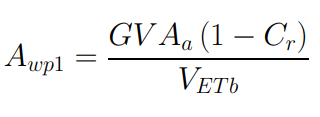

 Reference: Safi, C., Pareeth, S., Yalew, S., van der Zaag, P., & Mul, M. (2023). Estimating agricultural water productivity using remote sensing derived data. Modeling Earth Systems and Environment, 1-11.

Link to get GVA and Cr:  https://tableau.apps.fao.org/views/ReviewDashboard-v1/country_dashboard?%3Adisplay_count=n&%3Aembed=y&%3AisGuestRedirectFromVizportal=y&%3Aorigin=viz_share_link&%3AshowAppBanner=false&%3AshowVizHome=n#1


 * After downloading Aquastat data, upload the file in Data folder


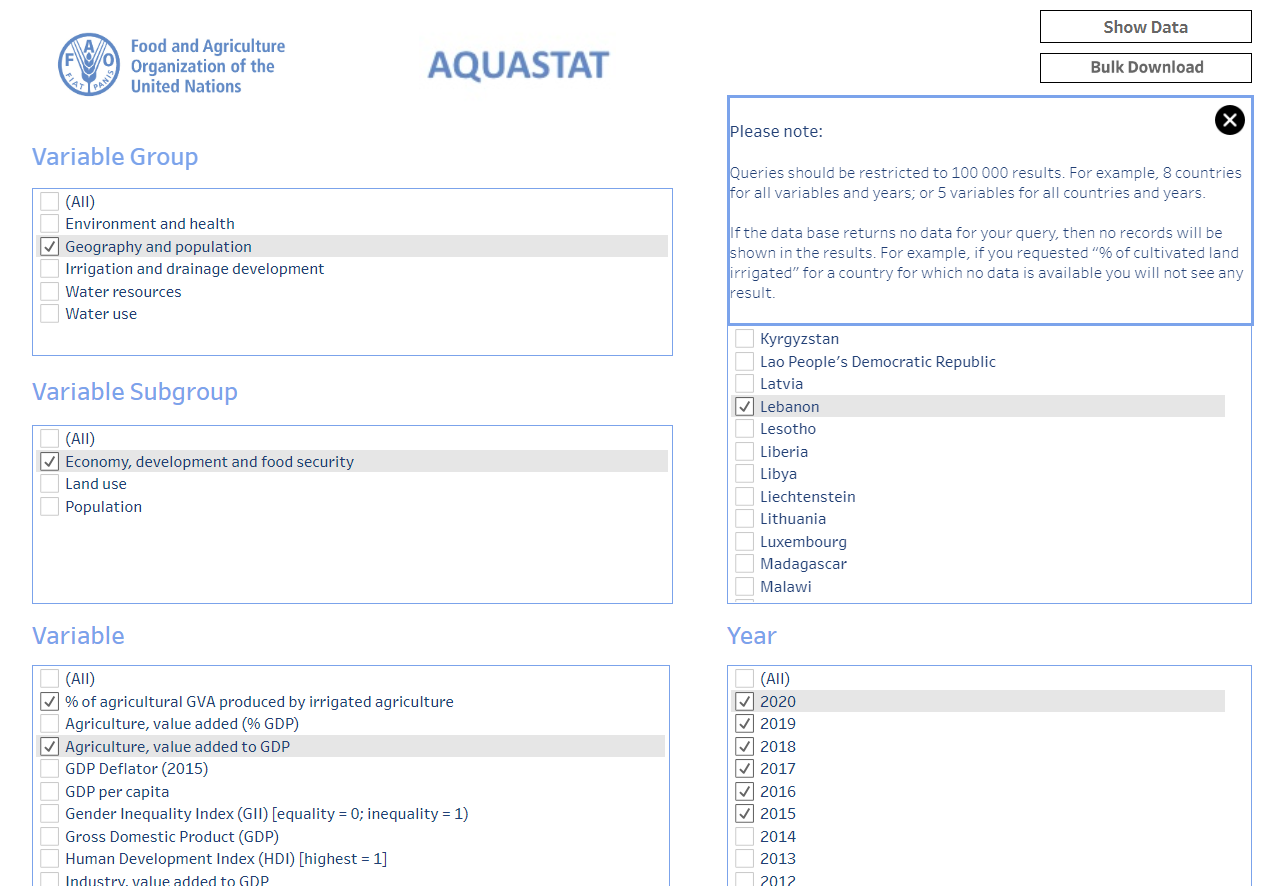

In [25]:
import pandas as pd

def merge_aquastat_data_into_ETb_yearly(ETb_file_path, aquastat_file_path, yearly_mean_gbwp_file_path):
    ETb_df = pd.read_excel(ETb_file_path)
    aquastat_df = pd.read_excel(aquastat_file_path)
    yearly_mean_gbwp_df = pd.read_excel(yearly_mean_gbwp_file_path)  # Read the yearly_mean_gbwp.xlsa file

    ETb_df['Year'] = ETb_df['Year'] + 2000
    yearly_mean_gbwp_df['Year'] = yearly_mean_gbwp_df['Year'] + 2000

    selected_aquastat_data_irrigated = aquastat_df[aquastat_df['Variable'] == "% of agricultural GVA produced by irrigated agriculture"]
    ETb_df['% of agricultural GVA produced by irrigated agriculture'] = selected_aquastat_data_irrigated['value'].values

    selected_aquastat_data_gdp = aquastat_df[aquastat_df['Variable'] == "Agriculture, value added to GDP"]
    ETb_df['Agriculture, value added to GDP'] = selected_aquastat_data_gdp['value'].values

    # Calculate the "AWP" column
    ETb_df['AWP_$/m3'] = (ETb_df['Agriculture, value added to GDP'] * (ETb_df['% of agricultural GVA produced by irrigated agriculture'] / 100)) / ETb_df['Volume_m3']

    # Merge the Mean_GBWP column from yearly_mean_gbwp_df into ETb_df
    ETb_df = ETb_df.merge(yearly_mean_gbwp_df[['Year', 'Mean_GBWP_$/m3']], on='Year', how='left')

    ETb_df.drop(columns=['Average ETb_Monthly'], inplace=True)

    print("Year, AWP, and Mean_GBWP columns:")
    print(ETb_df[['Year', 'AWP_$/m3', 'Mean_GBWP_$/m3']])

    output_file_path = output_directory + "AWP.xlsx"  ## Path to save the calculation output
    ETb_df.to_excel(output_file_path, index=False)

    return output_file_path

ETb_file_path = output_directory + "ETb_Yearly.xlsx"  ## Path to ETb_Yearly folder
aquastat_file_path = output_directory + "AQUASTAT.xlsx"  ## Path to Aquastat file
yearly_mean_gbwp_file_path = output_directory + "yearly_mean_gbwp.xlsx"  ## Path to yearly_mean_gbwp.xlsx file

# Call the function to merge the data and get the path of the output file
output_file_path = merge_aquastat_data_into_ETb_yearly(ETb_file_path, aquastat_file_path, yearly_mean_gbwp_file_path)
print("Data merged successfully! The output file is saved at:", output_file_path)


Year, AWP, and Mean_GBWP columns:
   Year  AWP_$/m3  Mean_GBWP_$/m3
0  2015  4.790975        1.783546
1  2016  5.343365        1.800943
2  2017  5.600912        1.639099
3  2018  5.117039        1.751397
4  2019  4.555243        1.663452
5  2020  6.092889        1.784753
Data merged successfully! The output file is saved at: /content/drive/MyDrive/Country_based_Colab_WaPOR4Awp/Data_check/AWP.xlsx


##6. Plotting the Agriculture water productivity graph

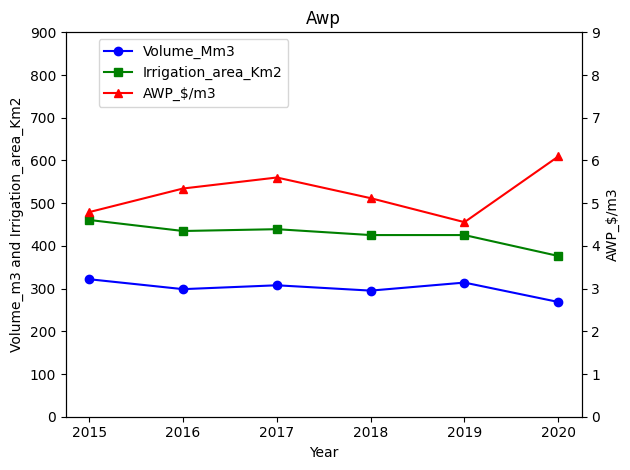

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_graph():
    excel_file_path = output_directory + 'AWP.xlsx'                           ## Path to calculated AWP file

    df = pd.read_excel(excel_file_path, sheet_name='Sheet1')
    df['Volume_m3'] /= 1000000

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    ax1.plot(df['Year'], df['Volume_m3'], color='b', marker='o', label='Volume_Mm3')
    ax1.plot(df['Year'], df['Irrigation_area_Km2'], color='g', marker='s', label='Irrigation_area_Km2')

    ax1.set_ylim(0, 900)
    ax1.set_ylabel('Volume_m3 and Irrigation_area_Km2')

    ax2.plot(df['Year'], df['AWP_$/m3'], color='r', marker='^', label='AWP_$/m3')

    ax2.set_ylim(0, 9)
    ax2.set_ylabel('AWP_$/m3')

    ax1.set_xlabel('Year')
    ax1.set_title('Awp')

    # Display the legend for both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.05, 1.0))

    # Display the plot
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_graph()


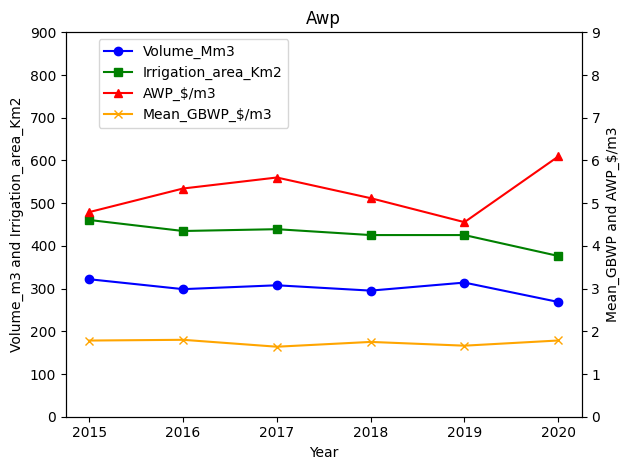

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_graph():
    excel_file_path = output_directory +'AWP.xlsx'  ## Path to calculated AWP file

    df = pd.read_excel(excel_file_path, sheet_name='Sheet1')
    df['Volume_m3'] /= 1000000

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    ax1.plot(df['Year'], df['Volume_m3'], color='b', marker='o', label='Volume_Mm3')
    ax1.plot(df['Year'], df['Irrigation_area_Km2'], color='g', marker='s', label='Irrigation_area_Km2')

    ax1.set_ylim(0, 900)
    ax1.set_ylabel('Volume_m3 and Irrigation_area_Km2')

    ax2.plot(df['Year'], df['AWP_$/m3'], color='r', marker='^', label='AWP_$/m3')

    ax2.set_ylim(0, 9)
    ax2.set_ylabel('AWP_$/m3')

    # Add the Mean_GBWP_$/m3 column to the secondary y-axis
    ax2.plot(df['Year'], df['Mean_GBWP_$/m3'], color='orange', marker='x', label='Mean_GBWP_$/m3')
    ax2.set_ylabel("Mean_GBWP and AWP_$/m3")

    ax1.set_xlabel('Year')
    ax1.set_title('Awp')

    # Display the legend for both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.05, 1.0))

    # Display the plot
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_graph()


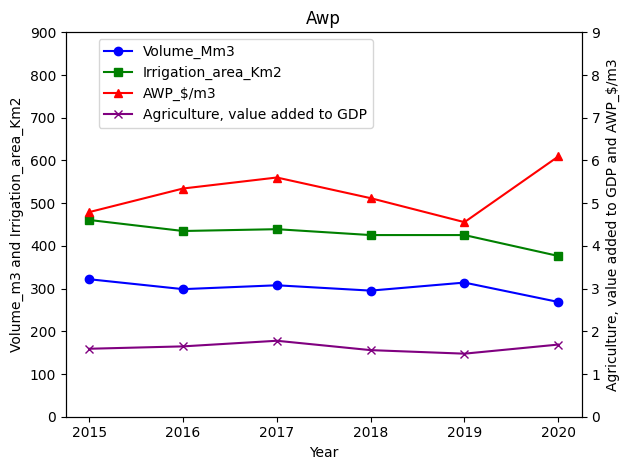

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_graph():
    excel_file_path = output_directory +'AWP.xlsx'  ## Path to calculated AWP file

    df = pd.read_excel(excel_file_path, sheet_name='Sheet1')
    df['Volume_m3'] /= 1000000
    df['Agriculture, value added to GDP'] /= 1000000000  # Divide Agriculture, value added to GDP column by 1,000,000,000

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    ax1.plot(df['Year'], df['Volume_m3'], color='b', marker='o', label='Volume_Mm3')
    ax1.plot(df['Year'], df['Irrigation_area_Km2'], color='g', marker='s', label='Irrigation_area_Km2')

    ax1.set_ylim(0, 900)
    ax1.set_ylabel('Volume_m3 and Irrigation_area_Km2')

    ax2.plot(df['Year'], df['AWP_$/m3'], color='r', marker='^', label='AWP_$/m3')

    ax2.set_ylim(0, 9)
    ax2.set_ylabel('AWP_$/m3')

    # Add the Agriculture, value added to GDP column to the secondary y-axis
    ax2.plot(df['Year'], df['Agriculture, value added to GDP'], color='purple', marker='x', label='Agriculture, value added to GDP')
    ax2.set_ylabel("Agriculture, value added to GDP and AWP_$/m3")

    ax1.set_xlabel('Year')
    ax1.set_title('Awp')

    # Display the legend for both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.05, 1.0))

    # Display the plot
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_graph()
